<a href="https://colab.research.google.com/github/jikspatel1191-tech/matplotlib/blob/main/netflixdatavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

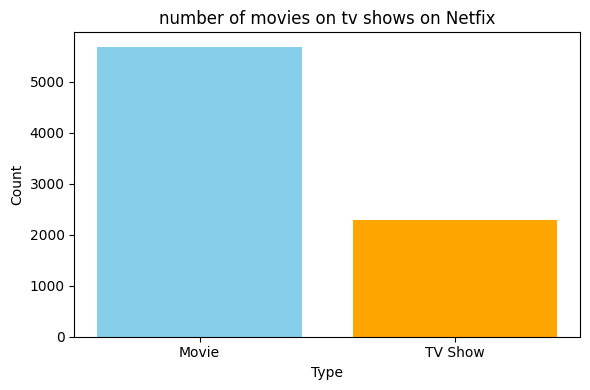

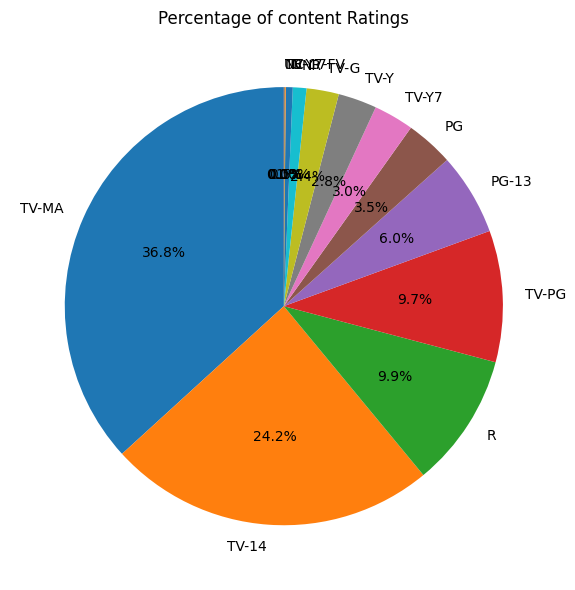

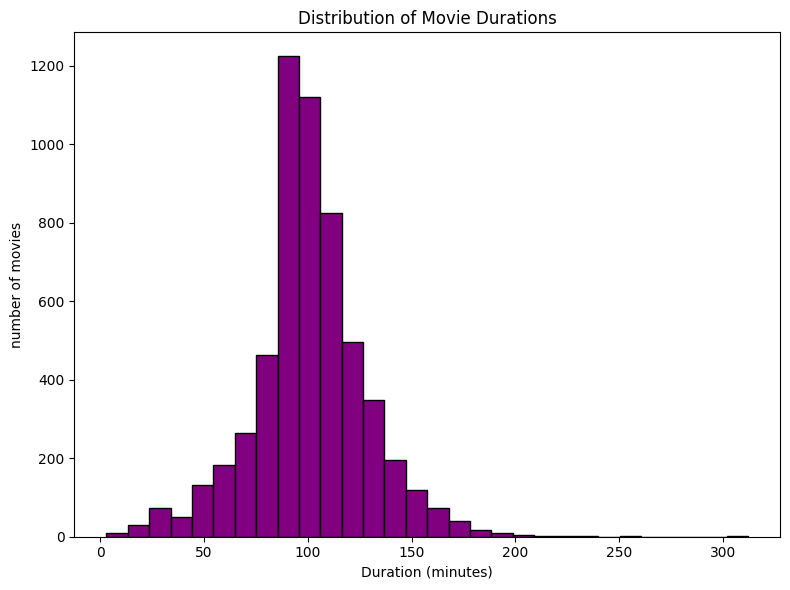

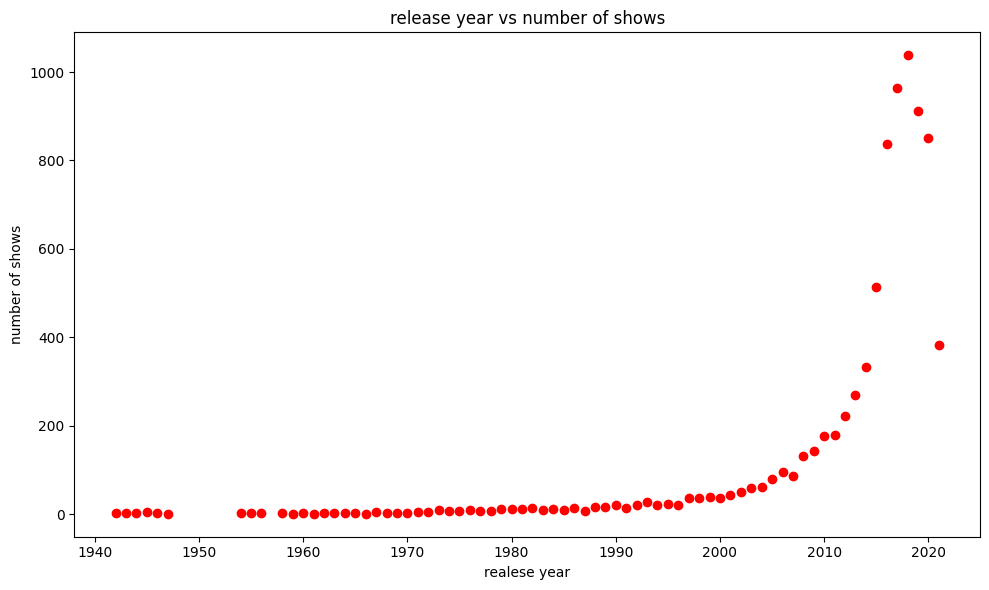

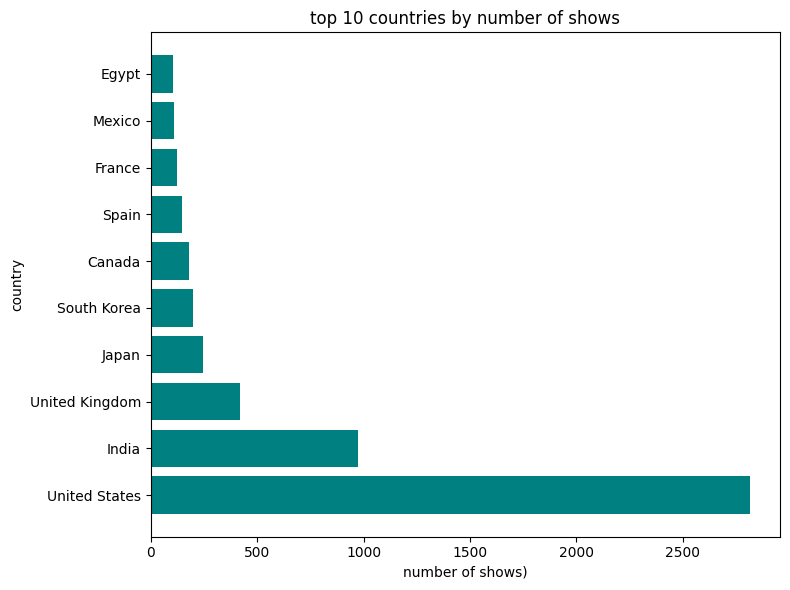

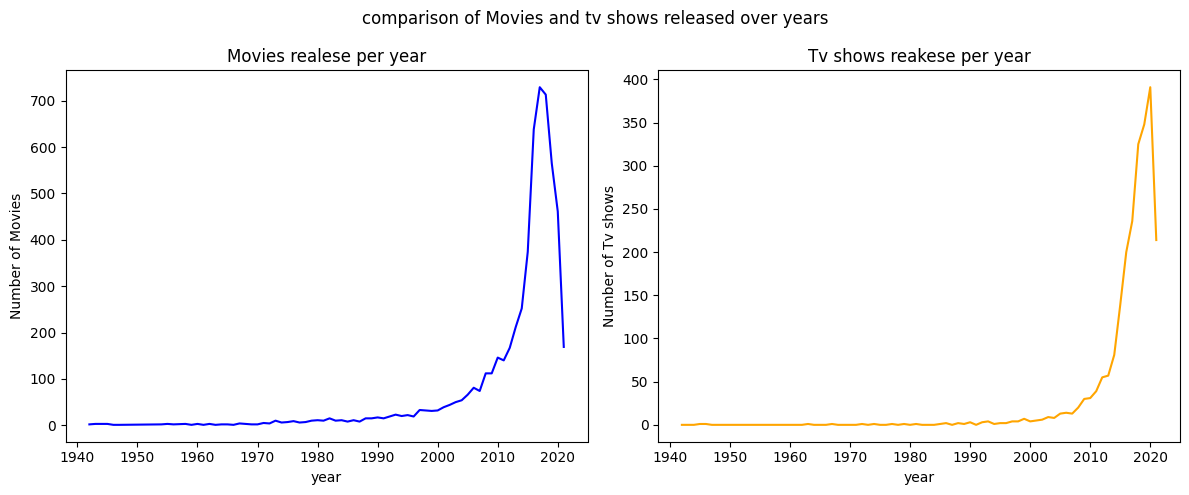

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('netflix_titles.csv')
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts =df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('number of movies on tv shows on Netfix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts , labels=rating_counts.index ,autopct='%1.1f%%', startangle=90 )
plt.title('Percentage of content Ratings')

plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig('movie_duration_hist.png')
plt.show()

release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('release year vs number of shows')
plt.xlabel('realese year')
plt.ylabel('number of shows')
plt.tight_layout()
plt.savefig('realese_year_scatter.png')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('top 10 countries by number of shows')
plt.xlabel('number of shows)')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies realese per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of Movies')

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('Tv shows reakese per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('Number of Tv shows')

fig.suptitle('comparison of Movies and tv shows released over years')
plt.tight_layout()
plt.savefig('movies_vs_tvshows_year_coamparison.png')
plt.show()